# 11_segmentation_results_summary.ipynb

This notebook summarizes **UNet segmentation results** for the HyacinthWatch project:

1. **Clean validation performance** (AqUavplant/val) — baseline vs robust.
2. **Robustness to degradation** — IoU/Dice vs severity per corruption.
3. **QC bucket analysis** — segmentation accuracy for Excellent vs Poor QC images, on:
   - clean validation
   - degraded validation (corruption × severity).

It expects the following CSVs from earlier notebooks:

- `runs/seg_eval_clean.csv`
- `runs/seg_eval_by_severity.csv`
- `runs/seg_eval_qc_clean.csv`
- `runs/seg_eval_qc_by_severity.csv`


In [ ]:
from google.colab import drive
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Mounting Google Drive...")
drive.mount("/content/drive", force_remount=True)

ROOT = Path("/content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data")
RUNS_DIR = ROOT / "runs"

print("ROOT:", ROOT)
print("RUNS_DIR:", RUNS_DIR)


Mounting Google Drive...
Mounted at /content/drive
ROOT: /content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data
RUNS_DIR: /content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data/runs


In [ ]:
# --- Load segmentation result tables ---
seg_clean_path       = RUNS_DIR / "seg_eval_clean.csv"
seg_bysev_path       = RUNS_DIR / "seg_eval_by_severity.csv"
seg_qc_clean_path    = RUNS_DIR / "seg_eval_qc_clean.csv"
seg_qc_bysev_path    = RUNS_DIR / "seg_eval_qc_by_severity.csv"

print("seg_eval_clean.csv exists?      ", seg_clean_path.exists())
print("seg_eval_by_severity.csv exists?", seg_bysev_path.exists())
print("seg_eval_qc_clean.csv exists?   ", seg_qc_clean_path.exists())
print("seg_eval_qc_by_severity.csv?    ", seg_qc_bysev_path.exists())

seg_clean    = pd.read_csv(seg_clean_path)
seg_bysev    = pd.read_csv(seg_bysev_path)
seg_qc_clean = pd.read_csv(seg_qc_clean_path)
seg_qc_bysev = pd.read_csv(seg_qc_bysev_path)

print("\nseg_clean:")
display(seg_clean)

print("\nseg_qc_clean:")
display(seg_qc_clean)

print("\nseg_bysev (head):")
display(seg_bysev.head())

print("\nseg_qc_bysev (head):")
display(seg_qc_bysev.head())


seg_eval_clean.csv exists?       True
seg_eval_by_severity.csv exists? True
seg_eval_qc_clean.csv exists?    True
seg_eval_qc_by_severity.csv?     True

seg_clean:


,model,corruption,severity,iou,dice,cover_abs_err,n
0,baseline,clean,0,0.611214,0.758700,0.041679,27
1,robust,clean,0,0.586399,0.739283,0.028079,27



seg_qc_clean:


,model,qc_bucket,corruption,severity,iou,dice,cover_abs_err,n
0,baseline,Excellent,clean,0,0.666125,0.799610,0.031721,27
1,robust,Excellent,clean,0,0.662071,0.796682,0.021826,27



seg_bysev (head):


,model,corruption,severity,iou,dice,cover_abs_err,n
0,baseline,brightness,1,0.614888,0.761524,0.039638,54
1,baseline,brightness,2,0.594329,0.745554,0.044262,54
2,baseline,brightness,3,0.583213,0.736746,0.031326,54
3,baseline,defocus,1,0.591073,0.742986,0.043863,54
4,baseline,defocus,2,0.317999,0.482548,0.068151,54



seg_qc_bysev (head):


,model,qc_bucket,corruption,severity,iou,dice,cover_abs_err,n
0,baseline,Excellent,brightness,1,0.668382,0.801234,0.029885,26
1,baseline,Poor,brightness,1,0.437284,0.608486,0.001720,1
2,baseline,Excellent,brightness,2,0.641412,0.781537,0.035344,26
3,baseline,Poor,brightness,2,0.177820,0.301947,0.006916,1
4,baseline,Excellent,brightness,3,0.601819,0.751419,0.034101,26


In [ ]:
print("Models in seg_clean:", seg_clean["model"].unique())
print("Models in seg_bysev:", seg_bysev["model"].unique())
print("Corruptions in seg_bysev:", seg_bysev["corruption"].unique())
print("Severities in seg_bysev:", seg_bysev["severity"].unique())

print("\nQC buckets in seg_qc_clean:", seg_qc_clean["qc_bucket"].unique())
print("QC buckets in seg_qc_bysev:", seg_qc_bysev["qc_bucket"].unique())


Models in seg_clean: ['baseline' 'robust']
Models in seg_bysev: ['baseline' 'robust']
Corruptions in seg_bysev: ['brightness' 'defocus' 'jpeg' 'lowres' 'noise']
Severities in seg_bysev: [1 2 3]

QC buckets in seg_qc_clean: ['Excellent']
QC buckets in seg_qc_bysev: ['Excellent' 'Poor']


In [ ]:
# --- Clean segmentation metrics summary ---
clean_pivot = seg_clean.pivot_table(
    index="model",
    values=["iou", "dice", "cover_abs_err"],
    aggfunc="mean"
)

print("Clean AqUavplant/val summary (baseline vs robust):")
display(clean_pivot)


Clean AqUavplant/val summary (baseline vs robust):


,cover_abs_err,dice,iou
model,,,
baseline,0.041679,0.758700,0.611214
robust,0.028079,0.739283,0.586399


In [ ]:
clean_pretty = clean_pivot.copy()
clean_pretty[["iou","dice"]] = clean_pretty[["iou","dice"]].round(3)
clean_pretty["cover_abs_err"] = clean_pretty["cover_abs_err"].round(3)
clean_pretty

,cover_abs_err,dice,iou
model,,,
baseline,0.042,0.759,0.611
robust,0.028,0.739,0.586


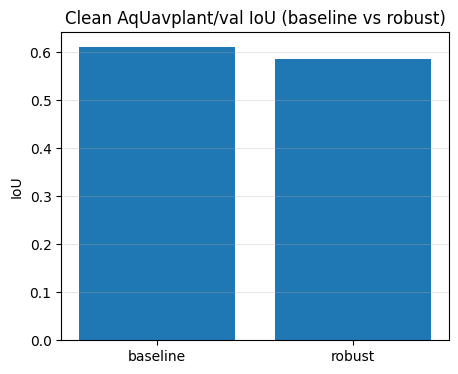

In [ ]:
plt.figure(figsize=(5,4))
x = np.arange(len(clean_pivot.index))
vals = clean_pivot["iou"].values

plt.bar(x, vals)
plt.xticks(x, clean_pivot.index)
plt.ylabel("IoU")
plt.title("Clean AqUavplant/val IoU (baseline vs robust)")
plt.grid(axis="y", alpha=0.3)
plt.show()

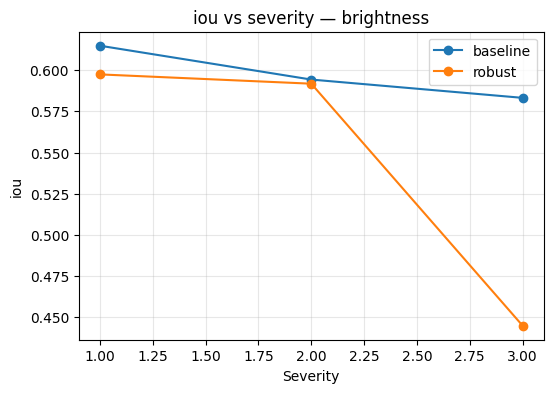

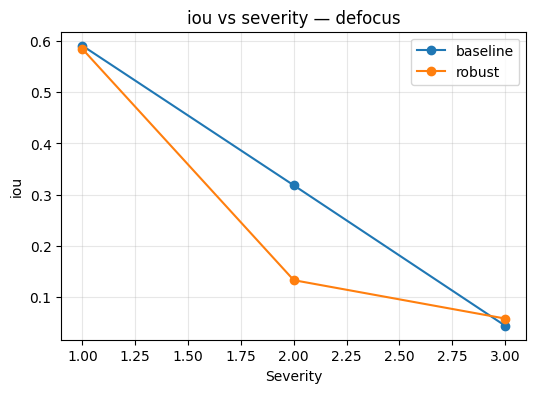

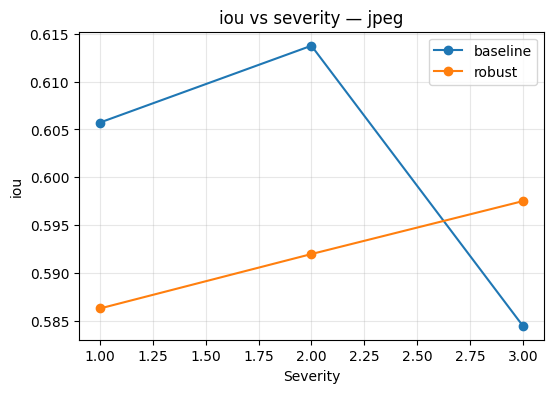

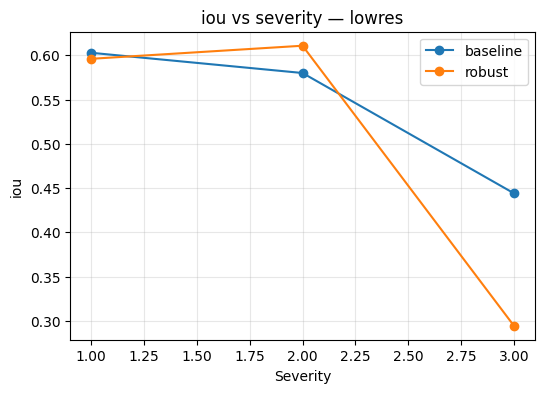

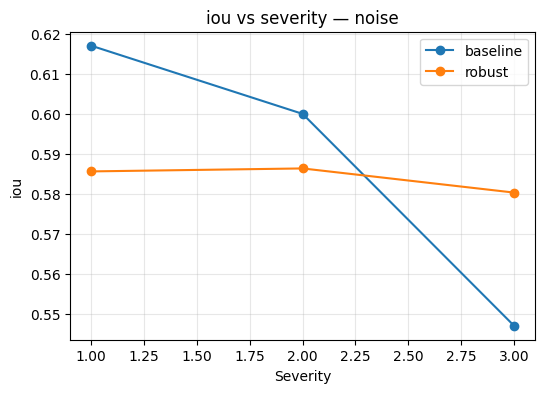

In [ ]:
def plot_metric_by_corruption(df, metric="iou"):
    models = sorted(df["model"].unique())
    corrs = sorted(df["corruption"].unique())
    for corr in corrs:
        sub = df[df["corruption"] == corr]
        if sub.empty:
            continue
        plt.figure(figsize=(6,4))
        for m in models:
            sm = sub[sub["model"] == m].sort_values("severity")
            if sm.empty:
                continue
            plt.plot(sm["severity"], sm[metric], marker="o", label=m)
        plt.title(f"{metric} vs severity — {corr}")
        plt.xlabel("Severity")
        plt.ylabel(metric)
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

plot_metric_by_corruption(seg_bysev, metric="iou")

In [ ]:
# --- Clean QC bucket summary (IoU) ---
qc_clean_pivot = seg_qc_clean.pivot_table(
    index="model",
    columns="qc_bucket",
    values="iou",
    aggfunc="mean"
)

print("Clean IoU by QC bucket:")
display(qc_clean_pivot)

# Optional rounded version
qc_clean_pretty = qc_clean_pivot.copy().round(3)
qc_clean_pretty

Clean IoU by QC bucket:


qc_bucket,Excellent
model,
baseline,0.666125
robust,0.662071


qc_bucket,Excellent
model,
baseline,0.666
robust,0.662


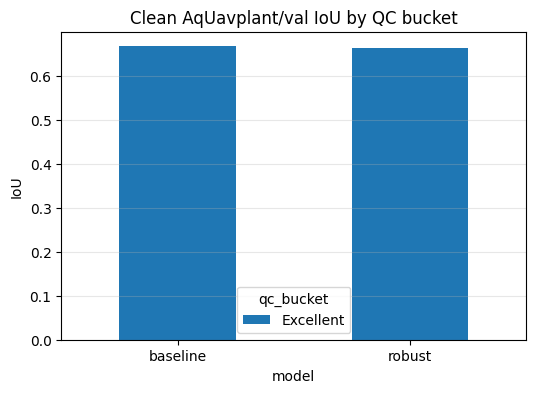

In [ ]:
plt.figure(figsize=(6,4))
qc_clean_pivot.plot(kind="bar", ax=plt.gca())
plt.ylabel("IoU")
plt.title("Clean AqUavplant/val IoU by QC bucket")
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=0)
plt.show()

=== baseline ===


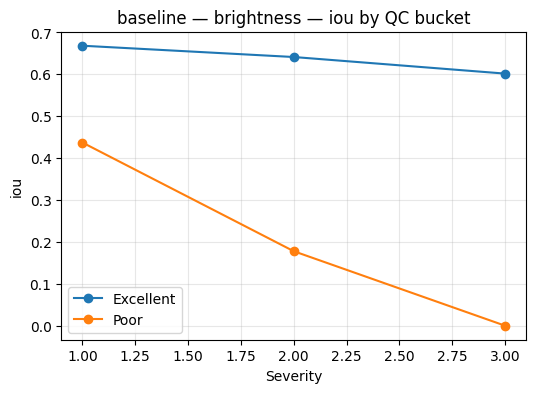

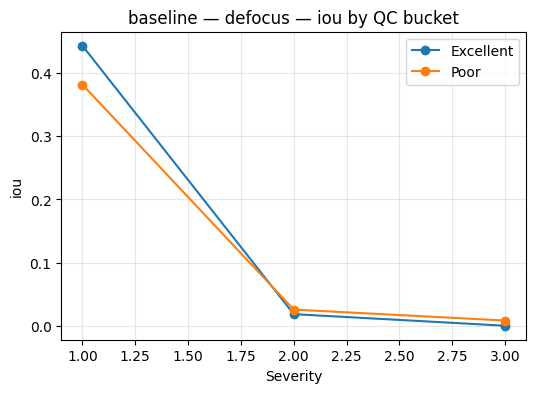

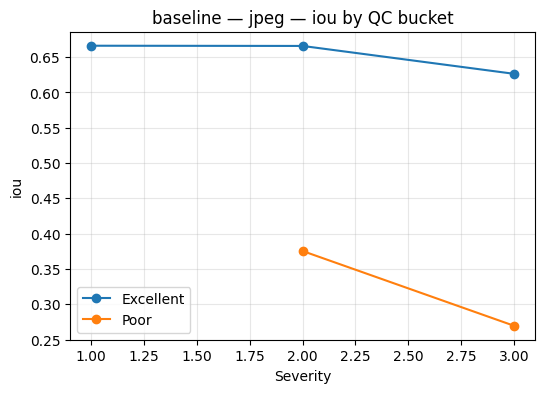

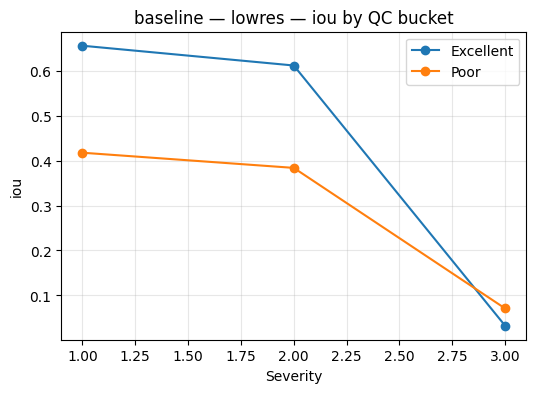

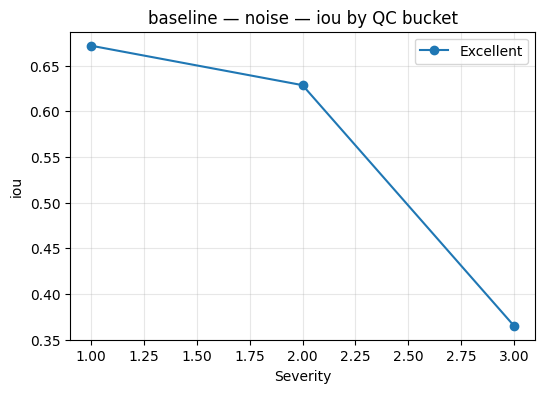

=== robust ===


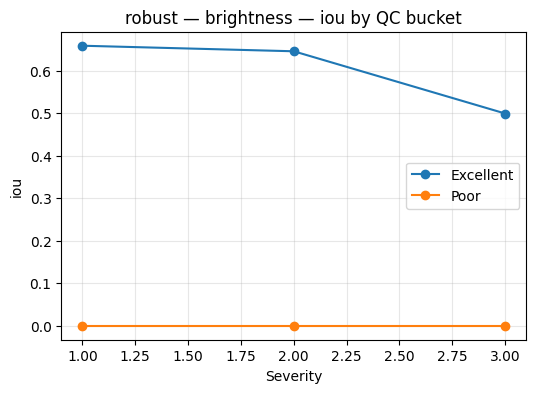

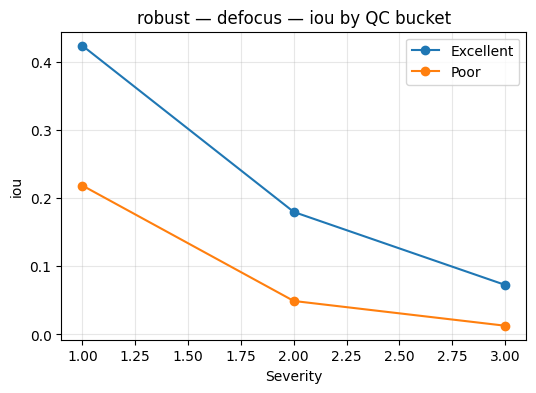

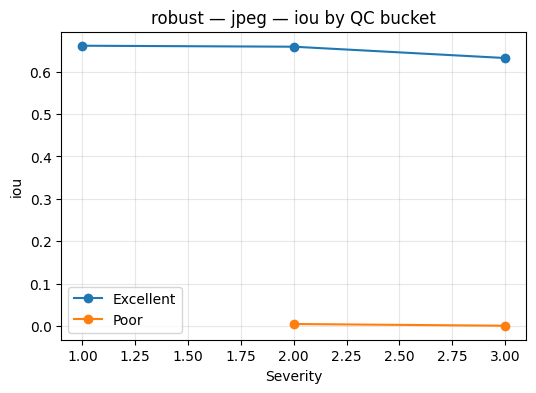

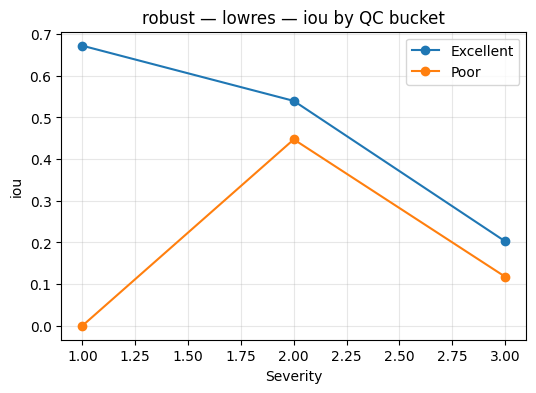

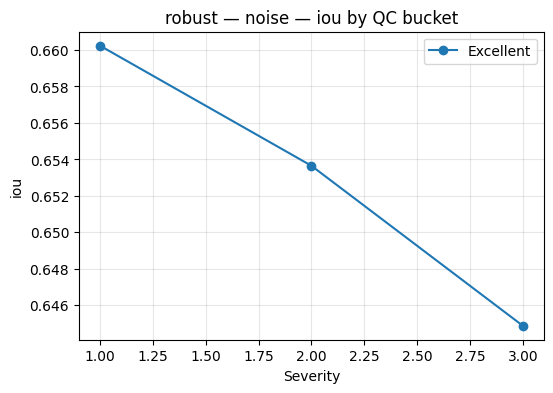

In [ ]:
def plot_qc_curves(df, model, metric="iou"):
    corrs = sorted(df["corruption"].unique())
    for corr in corrs:
        sub = df[(df["model"] == model) & (df["corruption"] == corr)]
        if sub.empty:
            continue
        plt.figure(figsize=(6,4))
        for bucket in ["Excellent", "Poor"]:
            sb = sub[sub["qc_bucket"] == bucket].sort_values("severity")
            if sb.empty:
                continue
            plt.plot(sb["severity"], sb[metric], marker="o", label=bucket)
        plt.title(f"{model} — {corr} — {metric} by QC bucket")
        plt.xlabel("Severity")
        plt.ylabel(metric)
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

for m in sorted(seg_qc_bysev["model"].unique()):
    print(f"=== {m} ===")
    plot_qc_curves(seg_qc_bysev, m, metric="iou")

In [ ]:
# --- IoU drop from clean to S3 by QC bucket (per model, per corruption) ---

rows = []
for m in seg_qc_bysev["model"].unique():
    for corr in seg_qc_bysev["corruption"].unique():
        for bucket in ["Excellent", "Poor"]:
            # IoU at S1 and S3 (or S0 vs S3 if you like)
            s3 = seg_qc_bysev.query(
                "model==@m and corruption==@corr and severity==3 and qc_bucket==@bucket"
            )
            s1 = seg_qc_bysev.query(
                "model==@m and corruption==@corr and severity==1 and qc_bucket==@bucket"
            )
            if len(s3) == 0 or len(s1) == 0:
                continue
            iou_s1 = s1["iou"].mean()
            iou_s3 = s3["iou"].mean()
            rows.append({
                "model": m,
                "corruption": corr,
                "qc_bucket": bucket,
                "iou_S1": iou_s1,
                "iou_S3": iou_s3,
                "delta_S1_to_S3": iou_s3 - iou_s1
            })

drop_df = pd.DataFrame(rows)
drop_df = drop_df.sort_values(["model","corruption","qc_bucket"])
drop_df_rounded = drop_df.copy()
drop_df_rounded[["iou_S1","iou_S3","delta_S1_to_S3"]] = drop_df_rounded[["iou_S1","iou_S3","delta_S1_to_S3"]].round(3)

display(drop_df_rounded)

,model,corruption,qc_bucket,iou_S1,iou_S3,delta_S1_to_S3
0,baseline,brightness,Excellent,0.668,0.602,-0.067
1,baseline,brightness,Poor,0.437,0.000,-0.437
2,baseline,defocus,Excellent,0.443,0.000,-0.442
3,baseline,defocus,Poor,0.381,0.009,-0.373
4,baseline,jpeg,Excellent,0.666,0.626,-0.040
5,baseline,lowres,Excellent,0.656,0.033,-0.623
6,baseline,lowres,Poor,0.418,0.071,-0.347
7,baseline,noise,Excellent,0.672,0.365,-0.307
8,robust,brightness,Excellent,0.659,0.500,-0.160
9,robust,brightness,Poor,0.000,0.000,0.000


In [ ]:
summary_dir = RUNS_DIR / "thesis_summaries"
summary_dir.mkdir(exist_ok=True)

clean_pretty.to_csv(summary_dir/"seg_clean_summary.csv")
qc_clean_pretty.to_csv(summary_dir/"seg_clean_qc_summary.csv")
drop_df_rounded.to_csv(summary_dir/"seg_qc_delta_S1_to_S3.csv", index=False)

print("Wrote summary CSVs to:", summary_dir)
list(summary_dir.iterdir())

Wrote summary CSVs to: /content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data/runs/thesis_summaries


[PosixPath('/content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data/runs/thesis_summaries/seg_clean_summary.csv'),
 PosixPath('/content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data/runs/thesis_summaries/seg_clean_qc_summary.csv'),
 PosixPath('/content/drive/MyDrive/HyacinthWatch_workspace/HyacinthWatch_data/runs/thesis_summaries/seg_qc_delta_S1_to_S3.csv')]